### Frequency matrix

In [8]:
def create_frequency_matrix(sentences):
    frequency_matrix={}
    stopwords = set(stopwords.words("english"))
    ps = PorterStemmer()
    
    for sent in sentences:
        freq_table={}
        words = word_tokenizer(sent)
        for word in words:
            word = ps.stem(word.lower())
            if word in stopwords:
                continue
            if word in freq_table: freq_table[word] +=1
            else: freq_table[word] = 1
        frequency_matrix[sent[:15]] = freq_table
    return frequency_matrix

In [10]:
text = """A term-frequency matrix is constructed from the dictionary and the document set by counting the number of occurences of each dictionary word in each document."""
print(create_frequency_matrix(sent_tokenizer(text)))

NameError: name 'sent_tokenizer' is not defined

### NLP and Supervised Classification

In [12]:
# Male and female names have distinctive characteristics.
# For instance, names ending in *a*, *e*, and *i* are likely to be female,
# while names ending in *k*, *o*, *r*, *s*, and *t* are likely to be male.
# Let's create a program to identify the key features (that is the last letter of a name).
# The returned value is known as the feature set.

def gender_features(word):
    return{'last_letter': word[-1]}

gender_features('Jack')

{'last_letter': 'k'}

In [24]:
# NLTK provides a "names" library for us to use.
# Let's create a list of examples and corresponding class labels.
# Let's examine the following code that uses the NaiveBayesClassifier.

import nltk
from nltk.corpus import names
nltk.download('names')
labeled_names = ([(name, 'male') for name in names.words('male.txt')] + [(name, 'female') for name in names.words('female.txt')])

featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]

train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\mohit\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!


In [19]:
# Let's try our classifier to predict the whether John is male or female.

classifier.classify(gender_features('John'))

'male'

In [20]:
# Let's use our classifier to predict whether John is male or female.

classifier.classify(gender_features('Eloise'))

'female'

In [25]:
# We can evalute the classifier to check its accuracy using the following code:

print(nltk.classify.accuracy(classifier, test_set))

0.602


In [27]:
# Let's examine the classifier to determine which features it found most effective for distinguishing the names' genders:

classifier.show_most_informative_features(5)

Most Informative Features
             last_letter = 'a'            female : male   =     35.5 : 1.0
             last_letter = 'k'              male : female =     34.1 : 1.0
             last_letter = 'f'              male : female =     15.9 : 1.0
             last_letter = 'p'              male : female =     13.5 : 1.0
             last_letter = 'v'              male : female =     12.7 : 1.0


In [28]:
# Let us use a simple dataset using the following variables:

weather = ['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny','Rainy','Sunny','Overcast','Overcast','Rainy']
temp = ['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']
play = ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [30]:
# We need to convert these string labels into numbers for example: 'Overcast','Rainy','Sunny' as 0,1,2. This is achieved by using the LabelEncoder():

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
weather_encoded = le.fit_transform(weather)
print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [31]:
# Let's encode temperature and label columns into numbers:

temp_encoded = le.fit_transform(temp) # temp stands for temperature
label = le.fit_transform(play)

In [32]:
# Now combine both the features (weather and temp) in a single variable (list of tuples):

features = list(zip(weather_encoded, temp_encoded))

In [33]:
# Now let's run our model:
#   - Create Naive Bayes classifier.
#   - Fit the dataset on the classifier.
#   - Perform a prediction:

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(features,label)
predicted = model.predict([[0,2]]) # 0:Overcast, 2:Mild
print("Predicted Value:", predicted)

Predicted Value: [1]


In [37]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


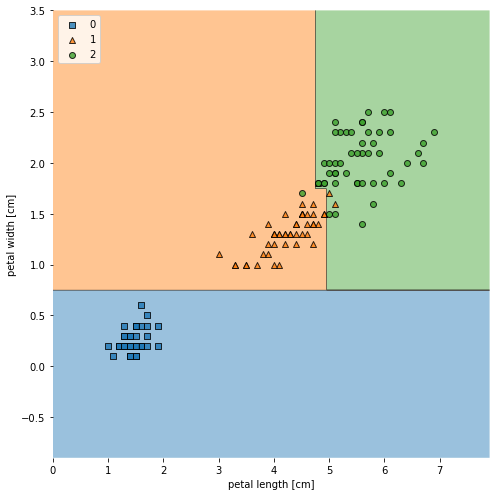

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =1, stratify=y)
clf_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state=1)
clf_tree.fit(X_train, y_train)

from mlxtend.plotting import plot_decision_regions
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

# The below code generates the diagram
fig, ax = plt.subplots(figsize=(7,7))
plot_decision_regions(X_combined, y_combined, clf=clf_tree)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

# Module 4 Exercises

**Task 1:** Use the following lists to run a simple Naive Bayes classifier. Transform the values to an encoded format. The workflow should include the LabelEncoder. Below is the data

weather = ['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny','Rainy','Sunny','Overcast','Overcast','Rainy']

temp = ['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play = ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [41]:
weather = ['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny','Rainy','Sunny','Overcast','Overcast','Rainy']
temp = ['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']
play = ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [42]:
# We need to convert these string labels into numbers, for example: 'Overcast','Rainy','Sunny' as 0,1,2 respectively. This is achieved by using the LabelEncoder():
# Importing label encoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
weather_encoded = le.fit_transform(weather)
print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [43]:
temp_encoded = le.fit_transform(temp) # temp stands for temperature
label = le.fit_transform(play)

features = list(zip(weather_encoded, temp_encoded))

In [45]:
print(temp_encoded)
print(label)

[1 1 1 2 0 0 0 2 0 2 2 2 1 2]
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


**Task 2:** Implement the Gausian Naive Bayes to provide the predicted value for playing in an overcast dat with milk temperature

In [44]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(features,label) # Using standard notations, this would be model.fit(X,y), where X = features and y = label.
predicted = model.predict([[0,2]]) # 0:Overcast, 2:Mild
print("Predicted Value:", predicted)

Predicted Value: [1]
